In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap
from scipy import spatial
import math

import seaborn as sns

imgroot = 'C:/Users/lezhi/Dropbox/thesis/img/'
dataroot = 'C:/Users/lezhi/Dropbox/thesis/data/'

In [23]:
df = pd.read_csv(dataroot+'realestate2.csv', index_col=0)
df['price'] = np.array([(el[1:].replace(',','') if (not pd.isnull(el)) else np.nan) for el in df['price']]).astype(float)

In [26]:
df['val-price'] = df.apply(lambda x: x.price if pd.isnull(x.val) else x.val, axis=1)

In [31]:
# df = df.dropna(subset=['fsz','val-price','lat','lng'], how='any') # len = 409
df['unit_val'] = df.apply(lambda x: x['val-price'] / x.fsz, axis=1)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


### exploring whether either 'construction time' or 'use' has influence on unit price distribution

In [34]:
uses = df['use'].unique()

In [120]:
dfgb = df.groupby('yr')
yr_df = dfgb['unit_val'].agg([np.mean, np.std])

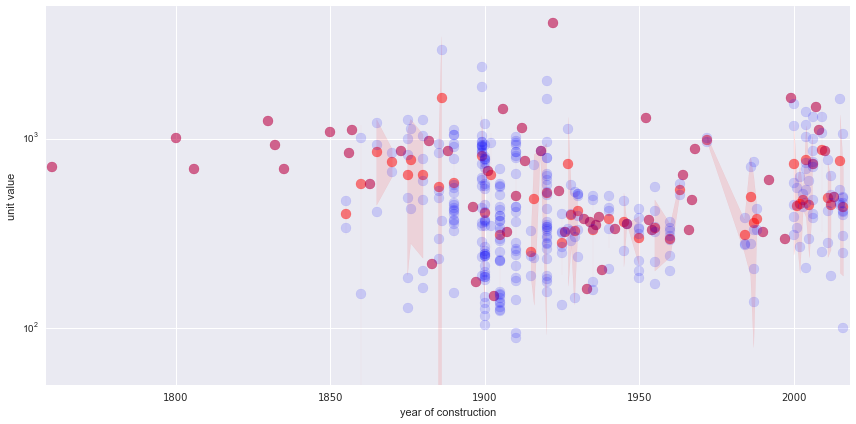

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), tight_layout=True)

mn=yr_df['mean']
std=yr_df['std']
yr=yr_df.index.values

#red
ax.scatter(yr, mn, color='r', alpha=0.5, s=100)
ax.fill_between(yr, mn-std, mn+std, color='r', alpha=0.1)

#blue
for name, group in dfgb['unit_val']:
    ax.scatter([name] * len(group), group, color='b', alpha=0.15, s=100)
    
#ax.set_xscale('symlog')
ax.set_yscale("log")
ax.set_xlim([1758,2018])
ax.set_ylim([50,5000])
    
ax.set_xlabel('year of construction')
ax.set_ylabel("unit value")

In [101]:
dfgb2 = df.groupby('use')

In [96]:
i = 0

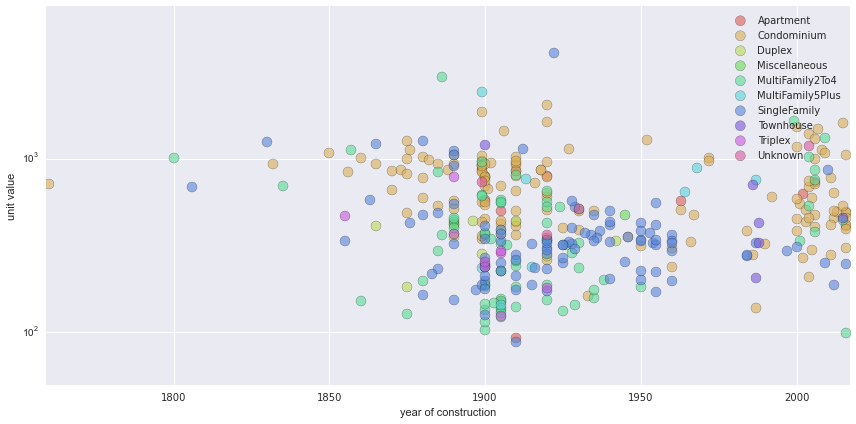

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), tight_layout=True)

mn=yr_df['mean']
std=yr_df['std']
yr=yr_df.index.values

colors = sns.color_palette("hls", 10) # cubehelix

for i, (name, group) in enumerate(dfgb2): 
    ax.scatter(group['yr'], group['unit_val'], label=name, alpha=0.6, s=100, c=colors[i])    

ax.set_yscale("log")
ax.set_xlim([1759,2017])
ax.set_ylim([50,7500])
ax.legend()
    
ax.set_xlabel('year of construction')
ax.set_ylabel("unit value")

### normalize by "use"

In [145]:
math.log(10)

2.302585092994046

In [146]:
df['Y']

0     -1.217812
1     -0.258735
3     -0.554403
4     -0.400404
5      1.607865
6     -0.067825
7     -0.107233
8     -1.428157
9     -0.342017
10     0.385191
11     0.453337
12     0.373359
13    -0.583926
14     1.458966
16    -0.098373
17    -0.198077
18    -0.105765
19    -0.531018
20    -0.108536
21    -0.107220
22    -0.844866
23    -0.484815
24     0.138965
25    -0.520092
26    -0.962438
27     0.737950
28     0.099817
29    -0.168161
30     0.245171
32     0.889653
         ...   
479   -0.473388
481   -0.100493
482   -0.138488
483   -0.107690
485   -0.782728
486   -0.889456
488    0.864731
490   -0.107799
491   -0.106142
492   -0.259004
494   -0.282182
495   -1.224906
499   -0.212972
500   -0.707107
501    0.846601
503   -0.102427
504   -0.649031
505    0.182812
506   -1.001354
507   -0.814573
508   -0.712899
509   -0.105772
510   -0.766905
511   -0.731701
512   -0.222768
513   -0.107556
514   -0.112206
515   -1.372801
541   -0.642116
542   -0.078353
Name: Y, dtype: float64

In [130]:
# remove outlier (error)
df = df.drop(df['Y'].idxmax(axis=1), axis=0)

In [163]:
df['Y'] = df.groupby('use')['unit_val'].transform(lambda x: (x - x.min()) / x.std() + 1)

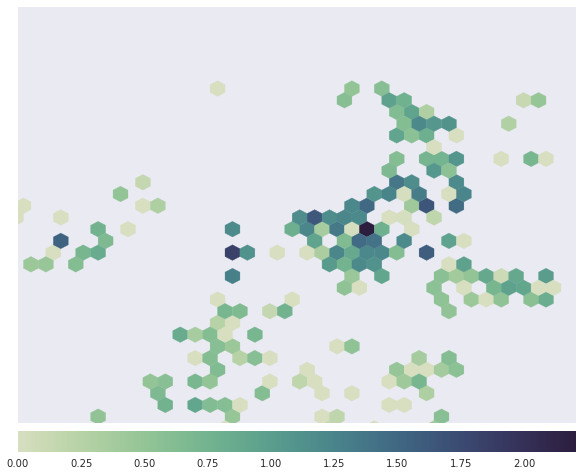

In [177]:
bounds = [-71.16197823, -71.02110553, 42.300087100000006, 42.40502692]

fig = plt.figure(figsize=(10,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(resolution = 'l', 
              epsg=4326,
              llcrnrlon = bounds[0], llcrnrlat = bounds[2], urcrnrlon = bounds[1], urcrnrlat = bounds[3])

cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True) # sns.diverging_palette(220, 20, n=7, as_cmap=True)
values = [math.log(x) for x in df['Y']]

map.hexbin(df['lng'].values, df['lat'].values, C=values, reduce_C_function = np.mean, gridsize = 45, cmap=cmap)

map.colorbar(location='bottom')

plt.show()

In [119]:
df

,fsz,lat,lng,rm,sz,url,use,val,yr,price,val-price,unit_val,Y
0,1288,42.286256,-71.120207,NaN,21969,http://www.zillow.com/webservice/GetDeepSearch...,Condominium,360741,2011,399000,360741,280.078416,-0.090194
1,2040,42.248300,-71.115951,7,8276,http://www.zillow.com/webservice/GetDeepSearch...,SingleFamily,629907,2000,599000,629907,308.777941,-0.258735
3,3132,42.244716,-71.121903,13,7046,http://www.zillow.com/webservice/GetDeepSearch...,SingleFamily,510706,1880,218000,510706,163.060664,-0.554403
4,1421,42.380374,-71.033872,7,1750,http://www.zillow.com/webservice/GetDeepSearch...,SingleFamily,339559,1900,389900,339559,238.957776,-0.400404
5,1528,42.350753,-71.086331,5,1742,http://www.zillow.com/webservice/GetDeepSearch...,Condominium,1919821,1875,2099000,1919821,1256.427356,-0.066683
6,1147,42.366200,-71.067250,NaN,NaN,http://www.zillow.com/webservice/GetDeepSearch...,MultiFamily5Plus,NaN,1964,736000,736000,641.673932,-0.067825
7,2256,42.382430,-71.033284,10,1742,http://www.zillow.com/webservice/GetDeepSearch...,MultiFamily2To4,417105,1900,489000,417105,184.886968,-0.107233
8,1654,42.311890,-71.090065,6,1742,http://www.zillow.com/webservice/GetDeepSearch...,Condominium,343037,2004,241000,343037,207.398428,-0.091944
9,1168,42.308870,-71.059367,7,2178,http://www.zillow.com/webservice/GetDeepSearch...,SingleFamily,312712,1900,225000,312712,267.732877,-0.342017
10,1926,42.333774,-71.036849,11,1045,http://www.zillow.com/webservice/GetDeepSearch...,Duplex,711434,1890,NaN,711434,369.384216,0.385191


In [17]:
pd.isnull(df.loc[10,'price'])

True

In [8]:
A = np.random.random((10,2))*100

In [12]:
A

array([[ 57.2887087 ,  72.66973878],
       [ 21.29714509,  19.70625033],
       [ 90.85276812,  16.73142041],
       [ 49.83603819,  60.98579739],
       [ 21.17518368,  54.46858789],
       [ 46.3897464 ,  19.1907922 ],
       [ 35.61530036,  67.42435768],
       [ 60.2044229 ,  42.20668763],
       [ 20.24954128,  30.51849335],
       [  9.09312293,  60.26628969]])

In [9]:
pt = [6, 30]

In [10]:
A[spatial.KDTree(A).query(pt)[1]]

array([ 20.24954128,  30.51849335])

In [13]:
spatial.KDTree(A).query(pt) # distance, index

(14.258971285758975, 8)